## Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

In [2]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

## Загрузка данных

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
test_df = pd.read_csv('test.csv')

## Первичная информация о датасете

In [5]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [6]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [7]:
train_df_num_features = train_df.select_dtypes(include=['int64', 'int32', 'float64'])

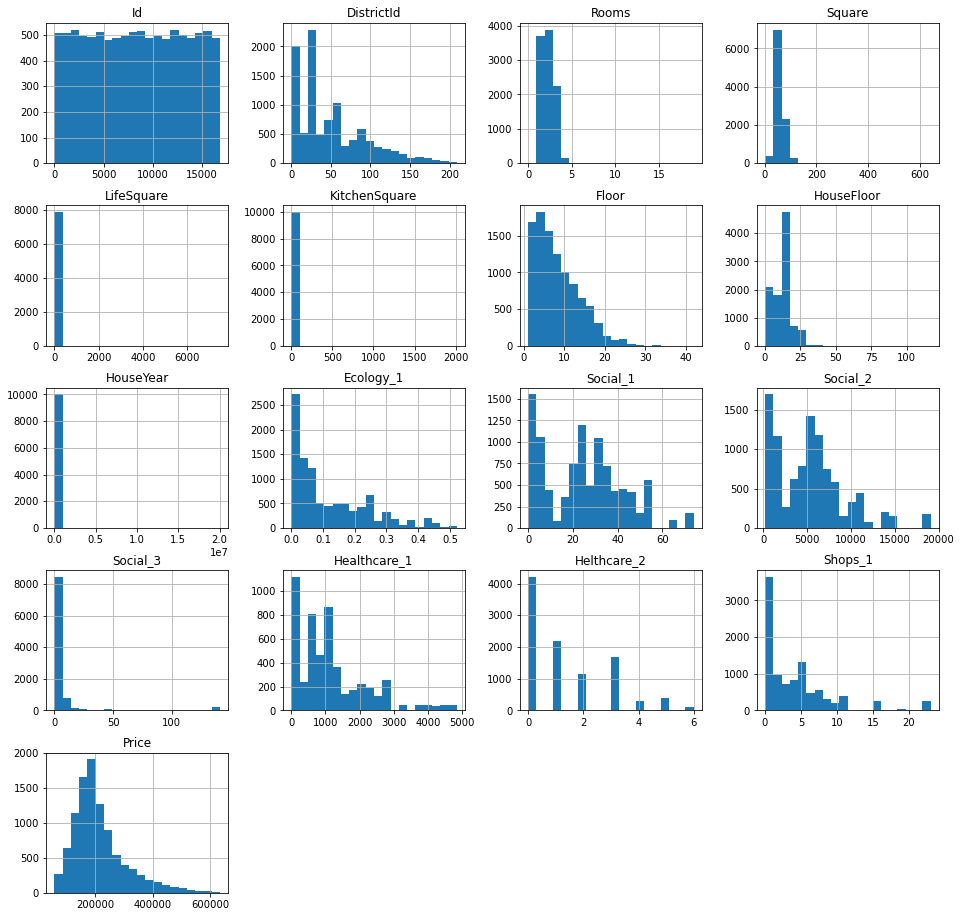

In [8]:
train_df_num_features.hist(figsize=(16, 16), bins = 20)
plt.show()

## EDA

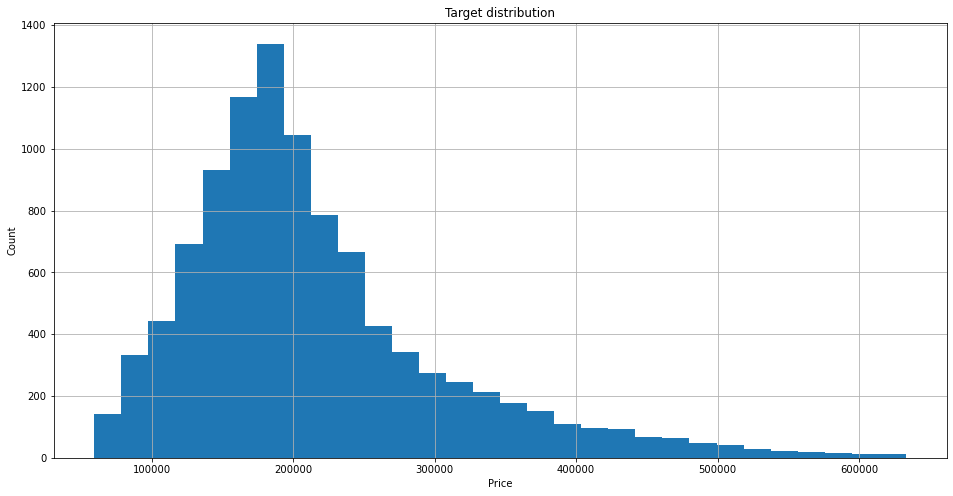

In [9]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

## Обработка выбросов, обработка пропусков

In [10]:
train_df['Id'] = train_df['Id'].astype(str)

In [11]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.life_square_quantile = None
                
    def fit(self, X):
        """Сохранение статистик"""
        # Расчет медиан
        self.medians = X.median()
        self.life_square_quantile_1 = X.LifeSquare.quantile(.975)
        self.life_square_quantile_2 = X.LifeSquare.quantile(.75)
        self.kitchen_square_quantile = X.KitchenSquare.quantile(.75)
                            
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        
        X.loc[X.Rooms == 0, 'Rooms'] = 1.0
        X.loc[(X.Rooms >= 6) & (X.Square < 60), 'Rooms'] = 2.0

        X.loc[(X.Rooms >= 6) & (X.Square > 60), 'Rooms'] = 3.0
        
        # Square
        
        X.loc[(X.Square > 130), 'Square'] = 130.0
        
        X.loc[(X.Square < 20), 'Square'] = 20.0
        
        # LifeSquare
        
        X.loc[((X.LifeSquare < 15) |
               (X.LifeSquare > self.life_square_quantile) |
               (X.LifeSquare > X.Square) |
               (X.LifeSquare.isna())
              ), 'LifeSquare'] = X.Square * self.medians['LifeSquare'] / self.medians['Square']
        
        # KitchenSquare
        
        X.loc[X.KitchenSquare < 5, 'KitchenSquare'] = 5
        
        X.loc[X.KitchenSquare > 20, 'KitchenSquare'] = 20
        
        X.loc[X.KitchenSquare > X.LifeSquare, 'KitchenSquare'] =\
            X.LifeSquare * self.kitchen_square_quantile / self.life_square_quantile_2
                
        # HouseFloor, Floor
        
        X.loc[(X.HouseFloor > 40) | (X.HouseFloor == 0), 'HouseFloor'] =\
            X[X.HouseYear == self.medians['HouseYear']]['HouseFloor'].median()
        
        X.loc[X.HouseFloor < X.Floor, 'HouseFloor'] = X.Floor
                                
        # HouseYear
        
        current_year = datetime.now().year
        
        X.loc[X.HouseYear > current_year, 'HouseYear'] = self.medians['HouseYear']
                       
        # Healthcare_1
        
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # Ecology_2
        
        if 'Ecology_2' in X.columns:
            X.drop('Ecology_2', axis=1, inplace=True)
        
        return X

## Генерация новых признаков

In [12]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.district_price_per_square = None
                
    def fit(self, X, y=None):
        
        
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
                
        # Target encoding
        ## District, Social_1
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Social_1'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
        
        ## District, Square
        
            self.district_price_per_square = df.groupby(['DistrictId'])['Price'].agg('median') \
        / df.groupby(['DistrictId'])['Square'].agg('median')
    
    def transform(self, X):
        
        # Binary features
        
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers) # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
                
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Social_1'], how='left')
            
            X['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)
        
        
        if self.med_price_by_district is not None:
            self.district_price_per_square.to_dict()
            X['DistrictPrice'] = X['DistrictId'].map(self.district_price_per_square)
        
            self.median_district_price_per_square = X['DistrictPrice'].median()
            X['DistrictPrice'].fillna(self.median_district_price_per_square, inplace=True)
        
        return X

## Отбор признаков

In [13]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['DistrictPrice', 'MedPriceByDistrict']

In [14]:
target_name = 'Price'

In [15]:
X = train_df.drop(columns=target_name)
y = train_df[target_name]

## Разбиение на train и test

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [17]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 17), (3300, 17), (5000, 17))

In [18]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 19), (3300, 19), (5000, 19))

In [19]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [20]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

## Построение модели

In [21]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=4,
                                     min_samples_leaf=40,
                                     random_state=42,  
                                     n_estimators=1750, 
                                     max_features='sqrt', 
                                     loss='huber', 
                                     learning_rate=0.025)

gb_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.025, loss='huber',
                          max_depth=4, max_features='sqrt', min_samples_leaf=40,
                          n_estimators=1750, random_state=42)

Train R2:	0.834
Test R2:	0.751


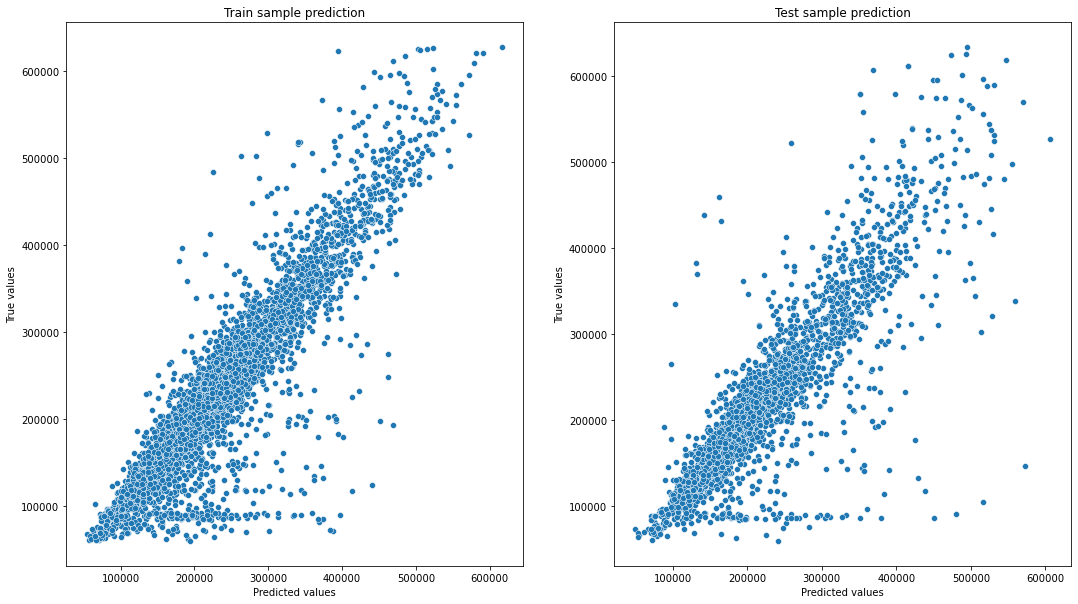

In [22]:
y_train_preds_gb = gb_model.predict(X_train)
y_test_preds_gb = gb_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds_gb, y_valid, y_test_preds_gb)

In [23]:
cv_score = cross_val_score(gb_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score.mean()

0.761519864523966

In [24]:
feature_importances = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.274163
16,MedPriceByDistrict,0.185750
15,DistrictPrice,0.146980
0,Rooms,0.123152
2,LifeSquare,0.060413
9,Social_1,0.037282
10,Social_2,0.036589
11,Social_3,0.033294
3,KitchenSquare,0.032314
6,HouseYear,0.020627


## Прогнозирование на тестовом датасете

In [25]:
test_df

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,DistrictPrice,MedPriceByDistrict
0,1.0,36.847630,19.094182,5.0,5,9.0,1970.0,0.036122,1,24,4378,0,1,1,1,4361.244898,205185.158059
1,1.0,42.493907,26.390015,10.0,7,17.0,2017.0,0.072158,1,2,629,1,0,0,0,2906.242857,157190.771131
2,2.0,59.463678,36.928762,9.0,19,19.0,1977.0,0.211401,1,9,1892,0,0,1,1,2625.465800,119817.448457
3,3.0,49.646030,33.893825,6.0,2,2.0,1965.0,0.014073,1,2,475,0,0,0,1,2126.848255,111207.565421
4,1.0,53.837056,33.434457,5.0,8,17.0,1977.0,0.309479,1,35,7715,4,0,6,1,3571.579537,156028.369596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,43.177521,30.339945,5.0,6,6.0,1962.0,0.069660,1,31,6119,4,1,2,1,4083.791865,179997.583936
4996,3.0,93.698122,58.189398,10.0,21,27.0,2018.0,0.060753,1,15,2787,2,0,7,1,5149.877243,300050.531161
4997,1.0,33.656723,19.003259,5.0,2,5.0,1966.0,0.038693,1,28,6533,1,2,5,1,3966.991351,195754.776066
4998,1.0,38.635155,20.976257,9.0,8,14.0,1970.0,0.089040,1,33,7976,5,0,11,1,4415.415932,220082.015992


In [26]:
submit = pd.read_csv('sample_submission.csv')

In [27]:
submit

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0
...,...,...
4995,10379,200000.0
4996,16138,200000.0
4997,3912,200000.0
4998,5722,200000.0


In [28]:
predictions = gb_model.predict(test_df)
predictions

array([169253.60265357, 121682.54705281, 149133.3584999 , ...,
       150220.35453258, 188884.68553321, 277833.69453898])

In [29]:
submit.Price = predictions
submit.head()

,Id,Price
0,4567,169253.602654
1,5925,121682.547053
2,960,149133.358500
3,3848,107309.002933
4,746,163340.964301


In [30]:
submit.to_csv('gb_submit_1.csv', index=False)